<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/Data_Science_12_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Linear Regression With NCCTG Cancer Data
In this chapter, we're diving into the NCCTG Lung Cancer Data (1994), a compelling dataset that opens up numerous learning opportunities in linear regression. Let's unpack what this dataset is about and how it can be a goldmine for your understanding of linear regression.

The **NCCTG Lung Cancer Data** represents a study of patients with advanced lung cancer, collected by the North Central Cancer Treatment Group. This dataset isn't just numbers—it's a snapshot of real human experiences, capturing the intricate details of cancer patients' lives. Here's a breakdown of the key elements in the dataset:

1. **Institution Code (inst)** — This is a code identifying the medical institution where the data was collected. Think of it as a tag that helps trace back to where the study was conducted.

2. **Survival Time (time)** — This is measured in days and is a critical piece of the dataset. It tells us how long each patient survived after their diagnosis.

3. **Censoring Status (status)** — A value of 1 indicates the patient was alive (censored) at the end of the study, while 2 indicates the patient had passed away. This is vital for survival analysis in statistics.

4. **Age, Sex** — These are straightforward—age in years, and sex coded as 1 for male and 2 for female. Such demographic information is essential for understanding patterns in the data.

5. **ECOG Performance Score (ph.ecog)** — This score, given by the physician, indicates how the illness affects the patient's daily activities. Lower scores mean better functioning.

6. **Karnofsky Performance Scores (ph.karno, pat.karno)** — These scores (ranging from 0 to 100) rate a patient's ability to carry out daily activities, with higher scores indicating better functioning. The twist? One is rated by the physician (ph.karno) and the other by the patient (pat.karno).

7. **Meal Calories (meal.cal), Weight Loss (wt.loss)** — These give insights into the patient's nutrition and physical health changes.

**Historical Footnote:** The use of 1 and 2 for alive/dead status, instead of the more common 0 and 1, is a quirky historical artifact from the days of punch cards and IBM 360 Fortran programming!

Linear regression will help us explore relationships in this dataset. For instance, we can investigate how factors like age, sex, performance scores, and nutrition relate to a patient's survival time. This isn't just about crunching numbers; it's about understanding the human aspects and the medical realities reflected in the data.

By using Python for our analysis, we can efficiently handle, process, and visualize this data, making complex statistical concepts more tangible and understandable. So, gear up for an engaging journey where we blend coding, statistics, and real-world applications to make sense of this important dataset!


## Exploring the Data
Let's first load the data and look at the head.

In [39]:
!pip install pydataset -q # Install required packages
from pydataset import data # Import required modules
import pandas as pd

In [40]:
# Display the head
cancer_df = data('cancer') # Load the mtcars dataset
cancer_df.head() # display first five rows

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


A couple of interesting observations immediately stand out here: First, the survival times (ranging from 210 to 1010 days) underscore the variability in patient outcomes, highlighting the individual nature of cancer progression. Secondly, the variation in Karnofsky scores (ranging from 60 to 100 as rated by patients or physicians) reveals differences in how patients and their doctors perceive patient health and capabilities. Intriguingly, while some patients (like Patient 1) have high Karnofsky scores, indicating good functional status, their survival times don't always correlate with these scores, suggesting that factors influencing survival are complex and multi-dimensional.

Additionally, the presence of `NaN` (Not a Number) in data points like weight loss and calorie intake emphasizes the challenges in data collection and the need for careful handling of missing data in analysis. These rows alone provide a rich context for exploring the interplay of clinical, demographic, and subjective factors in patient outcomes, serving as a foundation for deeper statistical investigation and learning in the field of medical data analysis.

In [41]:
# Display Basic Info
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 228
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inst       227 non-null    float64
 1   time       228 non-null    int64  
 2   status     228 non-null    int64  
 3   age        228 non-null    int64  
 4   sex        228 non-null    int64  
 5   ph.ecog    227 non-null    float64
 6   ph.karno   227 non-null    float64
 7   pat.karno  225 non-null    float64
 8   meal.cal   181 non-null    float64
 9   wt.loss    214 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 19.6 KB


We see here that the DataFrame contains 228 entries, indexed from 1 to 228. This implies you have data for 228 patients.

- There are 10 columns, each representing a different variable like institution code (`inst`), survival time (`time`), patient status (status), etc. The dataset combines integer (int64) and floating-point (float64) data types, indicating the presence of both categorical (like sex and status) and continuous variables (like ph.karno, meal.cal).

- The **non-null count** for each column indicates how many entries in that column contain valid data. For example, `inst` has 227 non-null entries out of 228, meaning there's one missing value in this column. Similarly, `meal.cal` has the most significant number of missing values (47), which could impact analyses related to nutritional intake.

The presence of null values in several columns (like inst, ph.ecog, ph.karno, pat.karno, meal.cal, and wt.loss) will require careful consideration. Depending on your analysis goals, you may need to decide whether to fill in these missing values (imputation), ignore them, or remove the affected rows.

In [42]:
cancer_df.describe()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
count,227.000000,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000
mean,11.088106,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776
std,8.303491,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902
min,1.000000,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000
25%,3.000000,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000
50%,11.000000,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000
75%,16.000000,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000
max,33.000000,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000


A few highlights stand out:

1.   The average survival time (`time`) is about 305 days, but the standard deviation is quite high (about 211 days), indicating a wide range of survival experiences among the patients. The minimum survival time is just 5 days, while the maximum extends to over three years (1022 days), highlighting the unpredictability and severity of advanced lung cancer.

2.  The average age of the patients is around 62 years, with a relatively small standard deviation, suggesting that most patients are elderly. The sex distribution (mean around 1.39) indicates a slight skew towards male patients.

3. The mean ECOG performance score (`ph.ecog`) is close to 1, indicating most patients are symptomatic but ambulatory. However, the Karnofsky scores (both physician-rated `ph.karno` and patient-rated `pat.karno`) average around 80, suggesting patients generally perceive themselves as maintaining a fair level of functioning.

4. The average calories consumed at meals (`meal.cal`) is around 929, but with a large standard deviation, reflecting significant variability in nutritional intake. Weight loss (`wt.loss`) also varies considerably, with some patients even gaining weight (negative weight loss), while others lose up to 68 pounds.

5.   Not all columns have 228 non-null entries, indicating missing data in several fields. This is particularly noteworthy in `meal.cal`, where near

## Visual Inspection of the Data
Before starting our data analysis, let's visually inspect the relationship between our different variables and `time` (i.e., how long a patient lived).

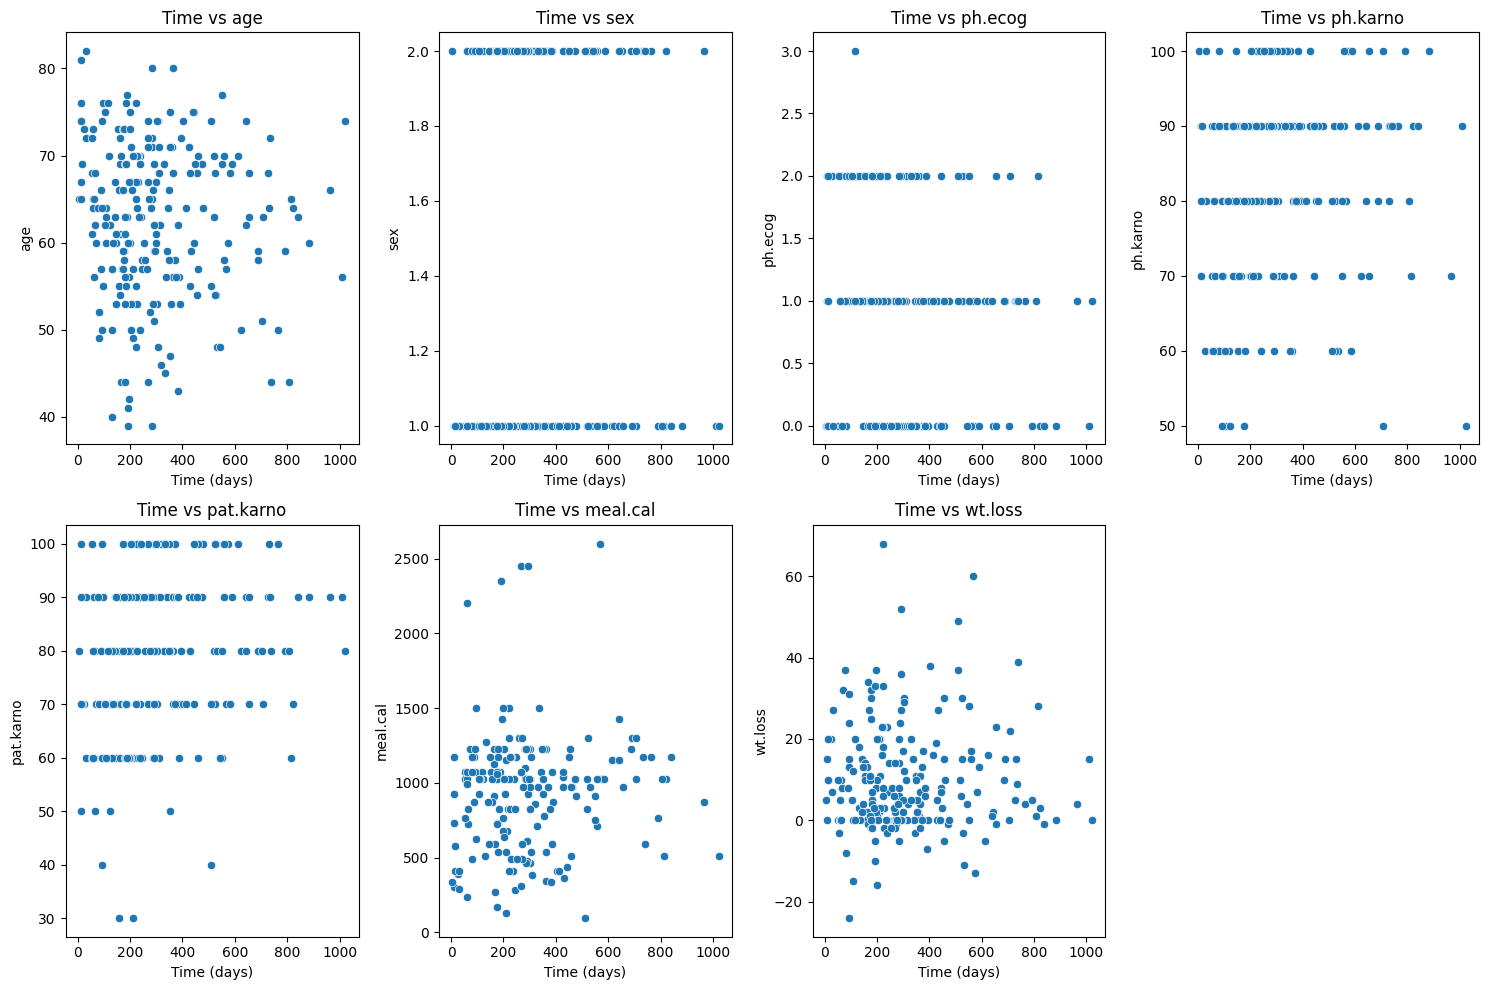

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot against 'time'
variables = ['age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno', 'meal.cal', 'wt.loss']

# Define the grid layout: 2 rows, 4 columns
n_rows = 2
n_cols = 4

# Create a figure with subplots in a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust the figsize as needed

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each variable and create a plot
for i, var in enumerate(variables):
    sns.scatterplot(x='time', y=var, data=cancer_df, ax=axes[i])
    axes[i].set_title(f'Time vs {var}')
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('Time (days)')

# Hide any unused subplots if the number of variables is less than the total plots
for i in range(len(variables), n_rows * n_cols):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()



The above image displays a series of scatter plots, each showing the relationship between survival time (in days) and another variable from the NCCTG Lung Cancer dataset. Scatter plots are useful for observing trends, clusters, or patterns that might indicate a relationship between two variables. A few highlights.

1.  The **Time vs Age** plot shows whether there is an apparent relationship between the age of patients and their survival time. We're looking for any trend where either as age increases or decreases, the survival time does the same. Here, the distribution seems quite scattered, indicating that age alone may not be a strong predictor of survival time.

2.  Since sex is a categorical variable (likely coded as 1 for males and 2 for females), the **Time vs Sex** plot is looking to see if there's a difference in survival time between the two groups. The data points are spread across two horizontal lines, one for each sex. There doesn't seem to be a clear separation between the sexes in terms of survival time based on this plot.

3.  The **Time vs ph.ecog** shows the relationship between the ECOG performance score (how well a patient can perform daily activities) and survival time. A lower ECOG score (which means better performance) doesn't seem to be tightly clustered around longer survival times, suggesting that while there might be a general trend, there are many outliers or individual differences.

4.  The Karnofsky performance score (**ph.karno**) by physicians appears to have a slight trend where higher scores (better condition) might be associated with longer survival, but again, the data is quite dispersed, indicating a variable relationship. The Karnofsky score as rated by patients (**pat.karno**) is similar

In all these plots, the lack of a clear, strong pattern suggests that survival time is likely influenced by a complex interplay of factors, rather than a simple linear relationship with any one variable. This is a lesson in how real-world data can often be more nuanced and requires careful statistical analysis to understand the underlying relationships.

## Data Cleaning

**Data cleaning** is an essential step in the preprocessing phase of a data analysis pipeline. The goal of data cleaning is to correct or remove inaccuracies, inconsistencies, and redundancies in the data to improve its quality for analysis or machine learning models. Poor data quality can lead to misleading results, which is why this step is so critical.  

When it comes to dealing with missing data, there are several strategies, and one common approach is **imputation**---replacing missing values with substituted ones. The rationale for imputation is that it allows you to retain data that may still be valuable for your analysis rather than discarding it outright. There are various methods for imputation, such as using the mean, median, mode, or even more complex algorithmic methods. The median is often chosen because it is less sensitive to outliers than the mean. It represents the middle value in the distribution of the data, ensuring that the imputed value is not skewed by extreme values.

Our basic process is as follow:

1.  First, you need to identify which variables have missing data and how much data is missing. In Python, this can be done using functions like `isnull()` and `sum()` on a pandas DataFrame.

2. Decide on the imputation method. Since we're focusing on median imputation, we'll replace missing values with the median of their respective columns.

3. For each column with missing data, calculate the median of the available values.

4.  Replace (or "Impute") the missing values with the corresponding median.

5.  After imputing, it's crucial to check that there are no missing values left and that the imputation hasn't introduced any errors or biases into the data.

Here's how you might perform median imputation in Python using pandas:

In [44]:
import pandas as pd

# Assuming cancer_df is your DataFrame and it's already loaded
# Step 1: Identify missing values
missing_data = cancer_df.isnull().sum()
print(missing_data[missing_data > 0])  # Print columns with missing data

# Step 2: Choose an Imputation Strategy
# We have chosen to impute with the median

# Step 3: Calculate the Median for each column
medians = cancer_df.median()

# Step 4: Impute the Median
cancer_df_filled = cancer_df.fillna(medians)

# Step 5: Verify the Imputation
print(cancer_df_filled.isnull().sum())  # This should now show zero missing values for all columns


inst          1
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64
inst         0
time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64


## Questions
1.  Imagine you're putting together a huge jigsaw puzzle, but some pieces are missing. This is like our dataset with missing values. Why do you think it's important to find these missing 'puzzle pieces' before analyzing the data? What might happen if we just leave these gaps in the data? And why would using the median (the middle value when all the data is sorted) be a good 'replacement piece' for the missing ones?

2.  Look at the scatter plots showing how long patients lived after their cancer diagnosis against different things like age, weight loss, and how well they could do everyday tasks. Which of these things seems to change the most with survival time? Why do you think that might be?

3. The data we looked at represents real people with their own stories. If you were a doctor using this data to help your patients, how could the patterns you found guide your decisions? What would you be careful about when using this data to make choices that affect people's health? Can you think of any rules that should be in place to make sure we're respectful and fair when we use patient data like this?

# What is Linear Regression?

**Linear Regression** is a statistical method that tries to show a relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable (also known as the **independent variable**), and the other is considered to be a **dependent variable**.

Imagine you have a table showing the amount of hours studied and the grades received by students. If you wanted to predict a grade based on the number of hours studied, you could use linear regression. In this case, the grade is the dependent variable because it depends on the number of hours studied, which is the independent variable.

In a more complex scenario like cancer research, researchers might use linear regression to understand the relationship between a patient's age and their survival time after diagnosis. Here's the catch: real life isn't as neat as our study hours and grades example. Factors like genetic differences, lifestyle, and treatment responses can all affect survival time, and these are all variables that might need to be considered.

So, why might cancer researchers use linear regression? Because it helps them identify which factors are important predictors of outcomes like survival time. It can also quantify the strength of the impact of these factors. For example, linear regression could help researchers understand whether the number of calories consumed during treatment is related to patient survival, and if so, how strongly.

Mathematically, linear regression finds the best-fitting straight line through the data points. This line is represented by an equation of the form:

$$ y = \beta_0 + \beta_1x + \epsilon $$

Here, $y$ is the dependent variable (like survival time), $x$ is the independent variable (like calorie intake), $\beta_0$ is the y-intercept of the line, $\beta_1$ is the slope of the line (which represents the relationship between $x$ and $y$), and $\epsilon$ is the error term (which accounts for the variability in $y$ that can't be explained by $x$ alone).

Linear regression is like finding the best fit line through a scatter plot of points. It's a fundamental tool for understanding and predicting relationships between variables and is invaluable in fields where such relationships can have profound implications, like in cancer research.


## Linear Regression in Python
Now that we understand the theory, let's walk through the process of creating and evaluating a simple one-variable linear regression model in Python.